<a href="https://colab.research.google.com/github/Marisagf/Projetos_de_Ciencias_de_Dados/blob/main/Regress%C3%A3o_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regressão Múltipla- Boston Housing
#### Vamos utilizar o Dataset Boston Housing

O "Boston Housing Dataset" é derivado de informações coletadas pelo Censo dos Estados Unidos sobre moradias na região de Boston, Massachusetts.:
Disponível/Fonte (Kaggle): https://www.kaggle.com/datasets/vikrishnan/boston-house-prices


Descrição dos campos do Dataset:

    - CRIM:Taxa de criminalidade per capita por cidade
    - ZN:Proporção de terreno residencial zoneado para lotes acima de 25.000 pés quadrados
    - INDUS:Proporção de acres de negócios não residenciais por cidade
    - CHAS:Variável dummy do Rio Charles (= 1 se o lote delimita o rio; 0 caso contrário)
    - NOX:Concentração de óxidos nitrosos (partes por 10 milhões)
    - RM:Número médio de cômodos por residência
    - AGE:Proporção de unidades residenciais ocupadas pelo proprietário construídas antes de 1940
    - DIS:Distâncias ponderadas para cinco centros de emprego em Boston
    - RAD:Índice de acessibilidade a rodovias radiais
    - TAX:Imposto sobre a propriedade por extenso por $ 10.000
    - PTRATIO:Proporção aluno-professor por cidade
    - B1000(Bk - 0,63)^2: onde Bk é a proporção de negros por cidade
    - LSTAT:percentual da população de baixa renda
    - TARGET:Valor mediano de casas próprias em $ 1000



In [1]:
# Carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

# para evitar mensagens de alerta/warnings.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Carregar o módulo de funções para limpeza de dados
from limpeza_dados import *

###Carregando os Dados

In [2]:
# para carregar o dataset vamos definir os nomes das colunas
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
dataset.head(5)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

###Analisando o Dataset

In [3]:
# Dimensões do dataset
print(np.shape(dataset))

(506, 14)


In [4]:
# Estatística descritiva do dataset
dataset.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
# verificando os tipos de dados do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# verificando se existe algum valor nulo
calcular_porcentagem_valores_ausentes(dataset)

O conjunto de dados tem 0.0% de valores ausentes.


In [7]:
# Exibindo o relatório de valores nulos por coluna
relatorio_valores_ausentes_por_coluna(dataset)

O conjunto de dados tem 14 colunas. 
Foram encontradas 0 colunas com valores ausentes.


Empty DataFrame
Columns: [Quantidade de Ausentes, Porcentagem de Ausentes, Tipo de Dado]
Index: []

###Algumas Visualizações do dataset

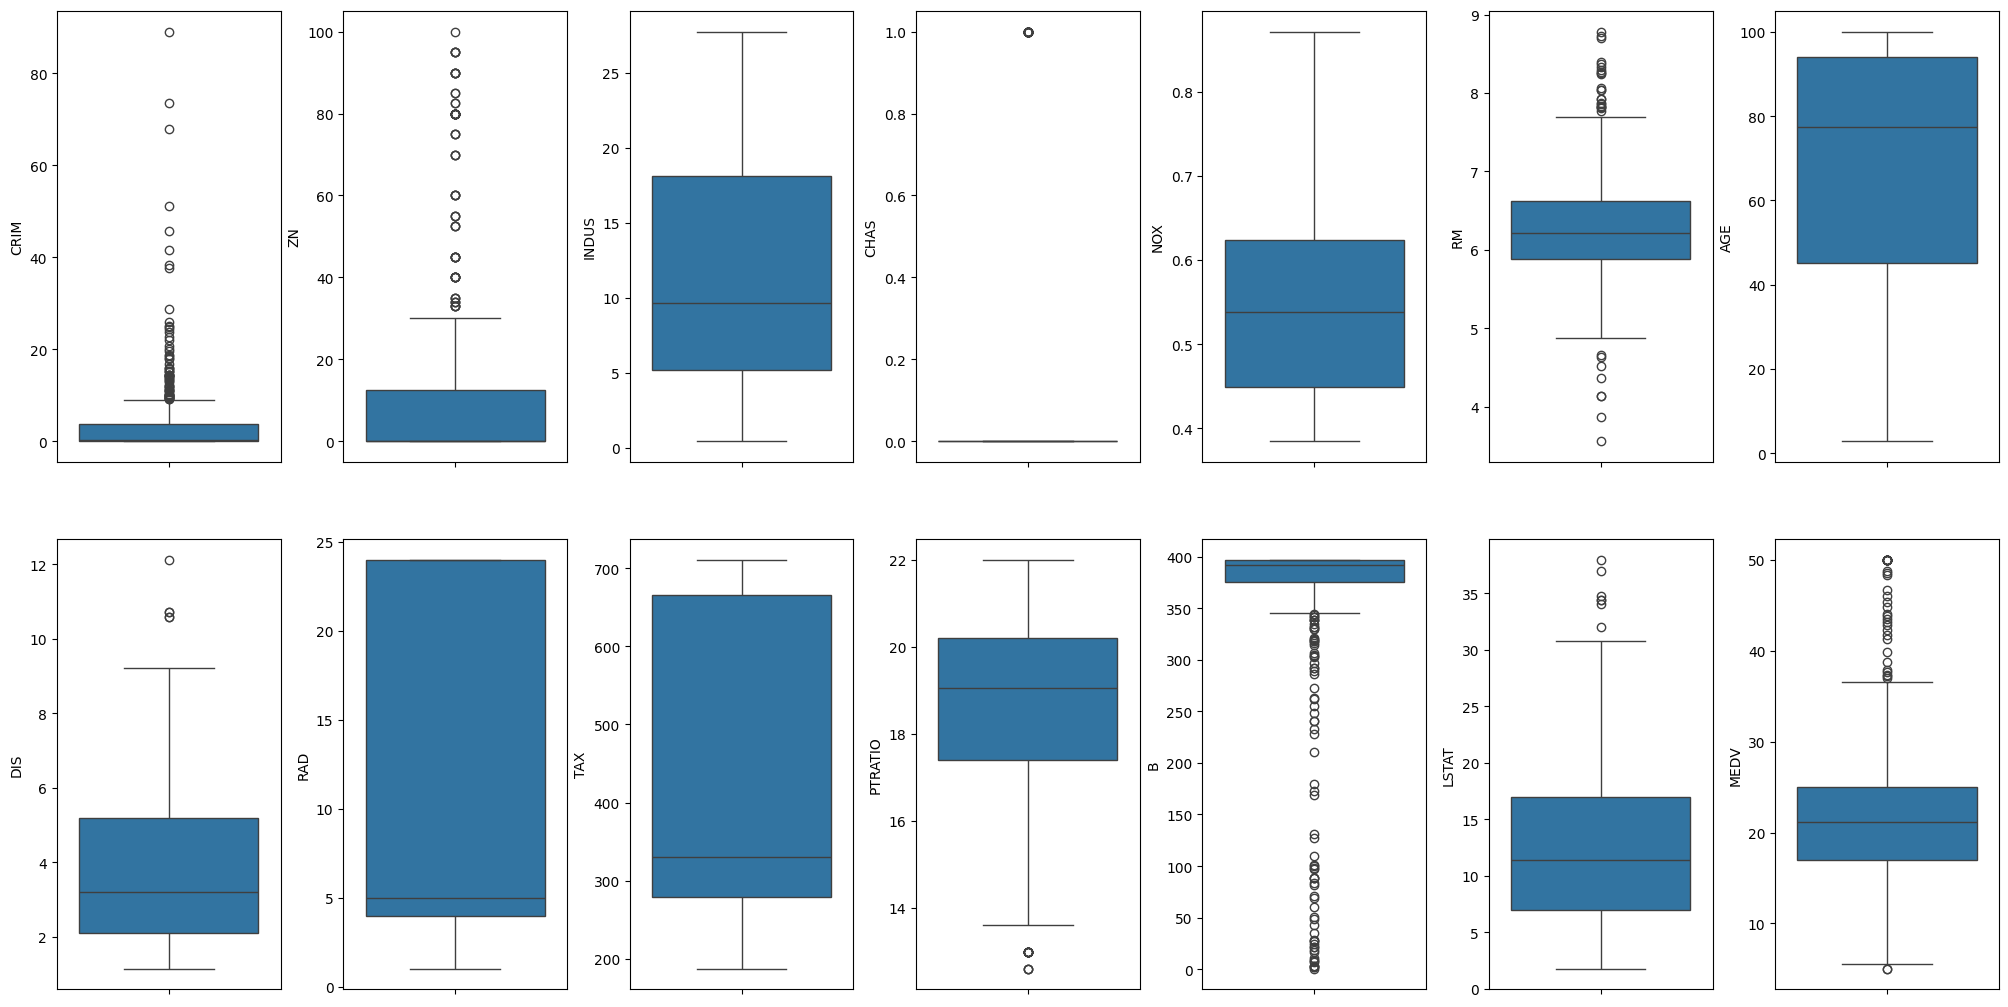

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

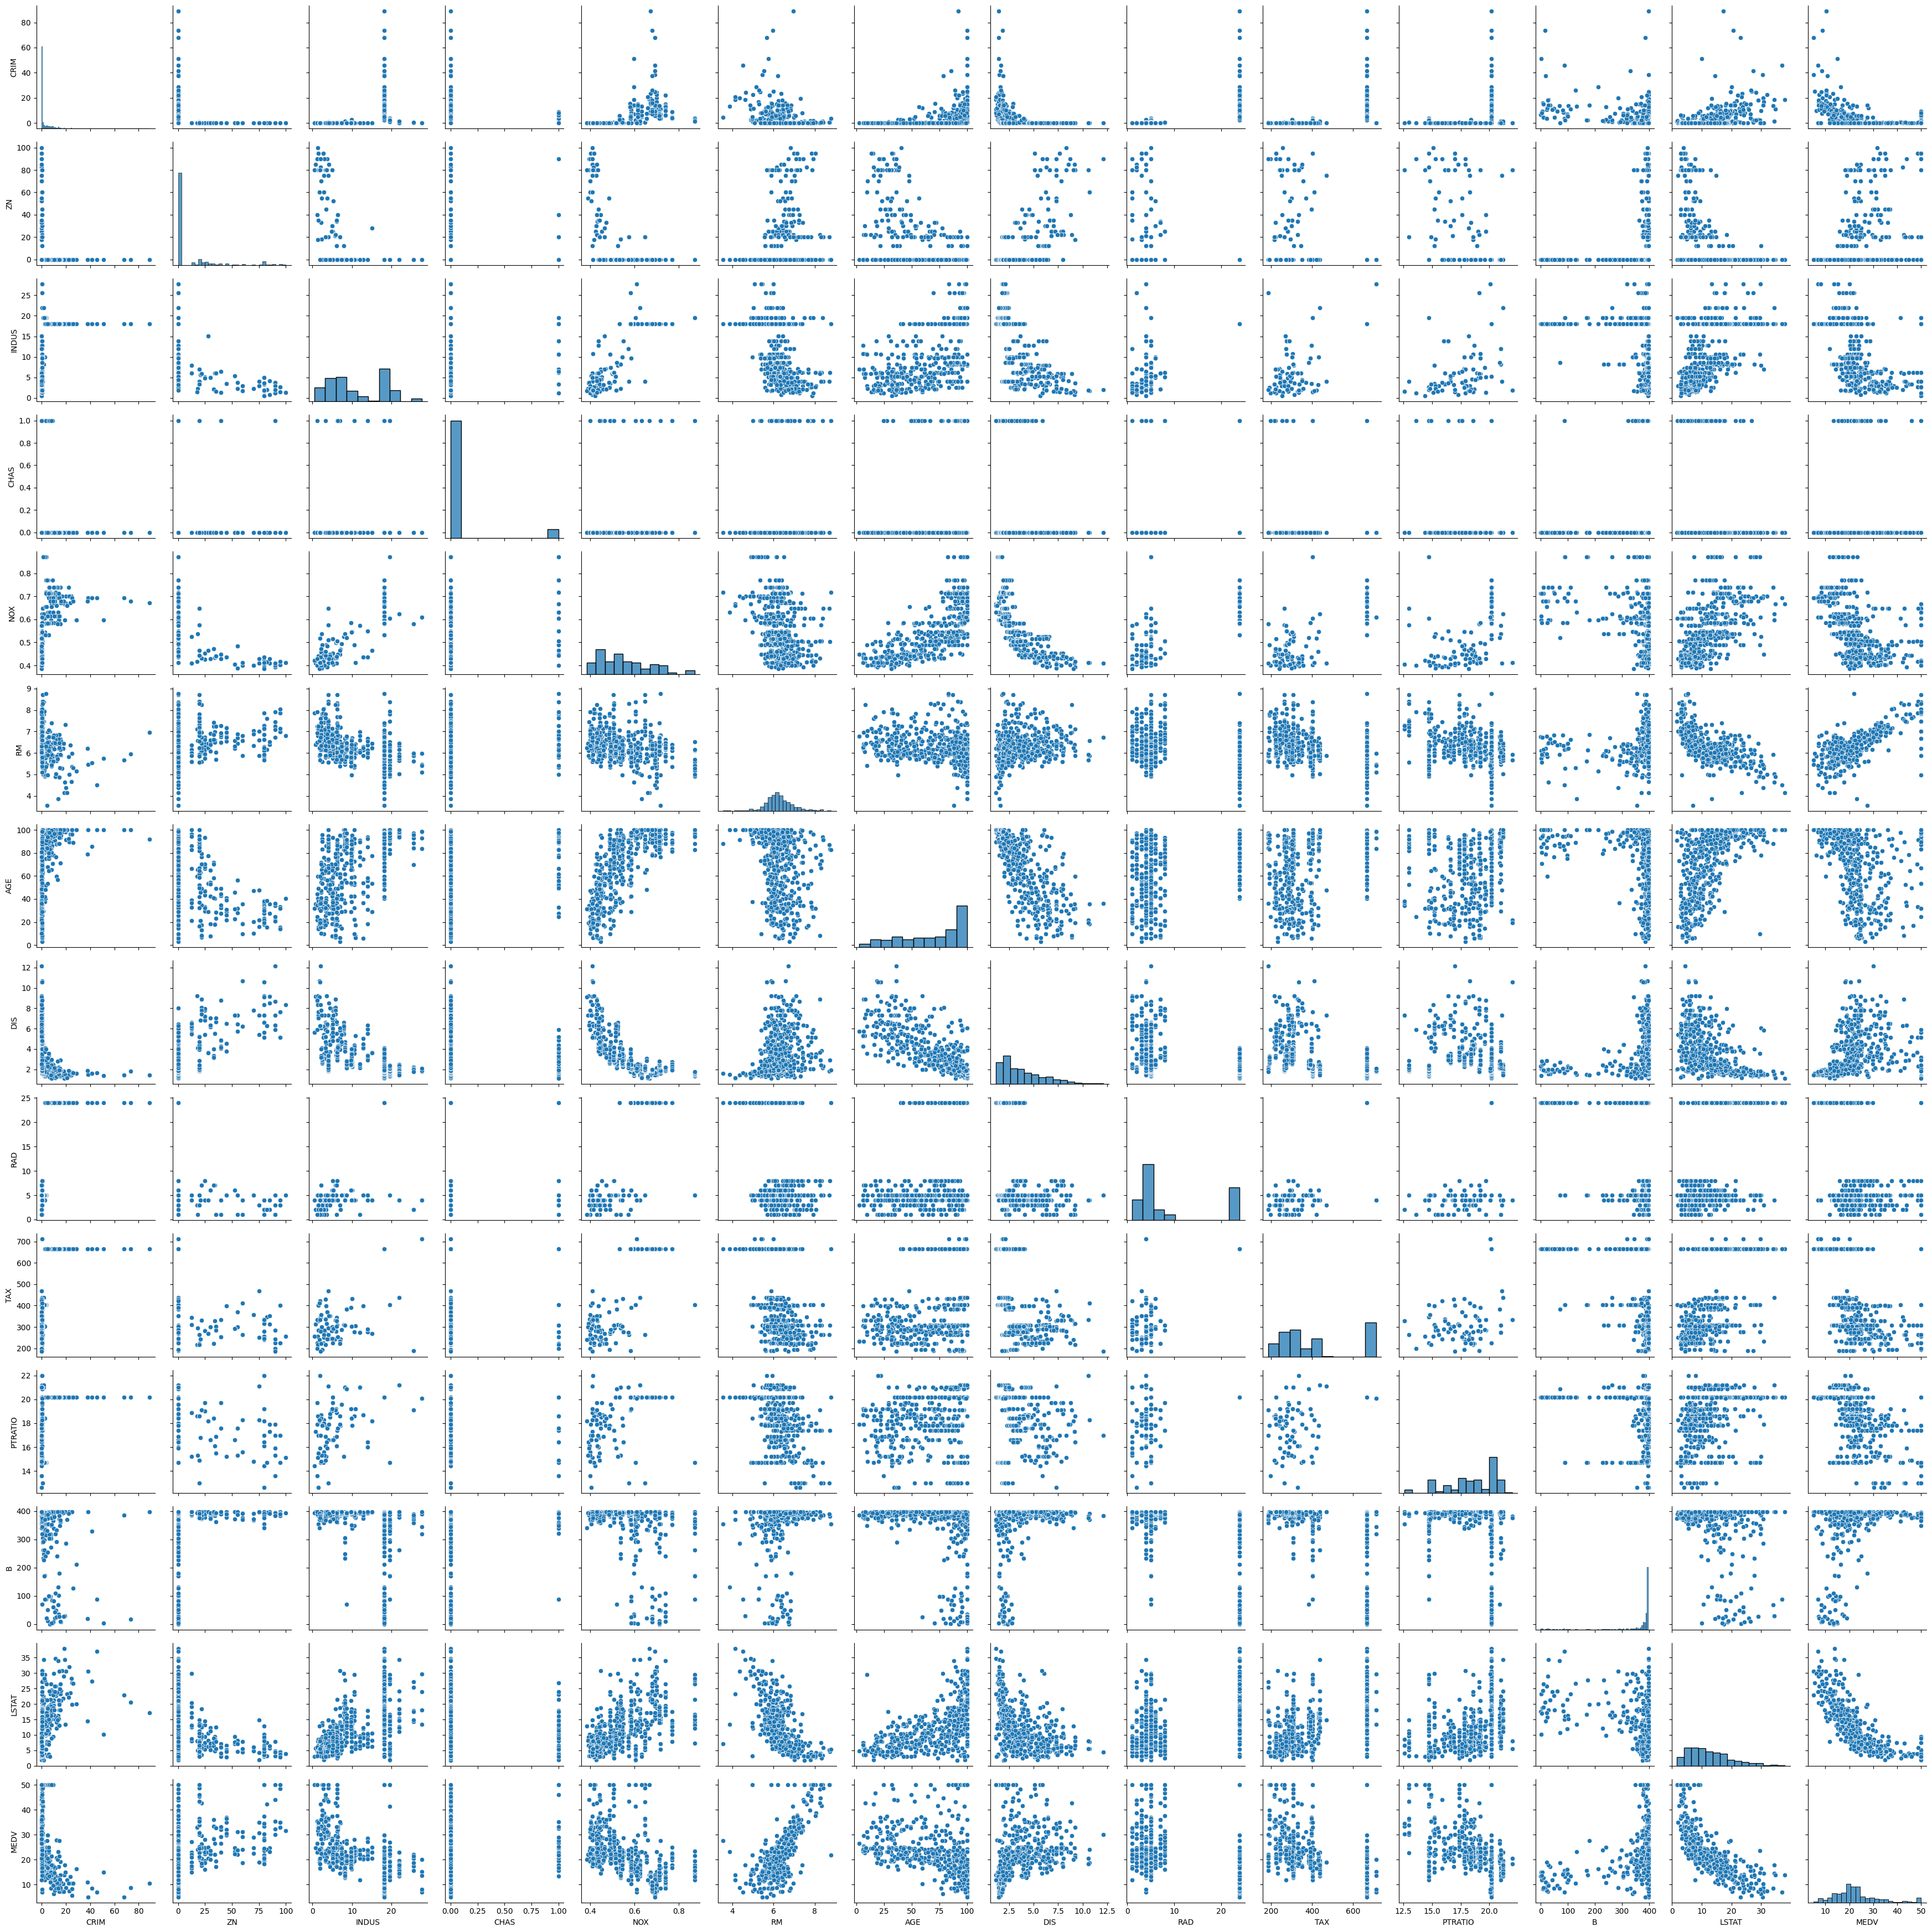

In [9]:
sns.pairplot(dataset, height=2.5)
plt.tight_layout()

Colunas como CRIM, ZN, RM, MEDV e B parecem conter outliers. Vamos verificar a porcentagem de outliers em cada coluna.

In [10]:
# Cria um objeto para tratar valores outliers
trata_outlier = ManipuladorDeOutliers(dataset)

In [11]:
# Cria uma lista de colunas float64
lista_colunas = dataset.select_dtypes('float64').columns.tolist()

In [12]:
# Mostra uma visão geral dos outliers
trata_outlier.gerar_visao_geral(lista_colunas)

Nome da Coluna                  B        ZN      CRIM      MEDV        RM  \
Mínimo                       0.32       0.0   0.00632       5.0     3.561   
Q1                       375.3775       0.0  0.082045    17.025    5.8855   
Mediana                    391.44       0.0   0.25651      21.2    6.2085   
Q3                        396.225      12.5  3.677083      25.0    6.6235   
Máximo                      396.9     100.0   88.9762      50.0      8.78   
IQR                       20.8475      12.5  3.595038     7.975     0.738   
Limite Inferior         344.10625    -18.75 -5.310511    5.0625    4.7785   
Limite Superior         427.49625     31.25  9.069639   36.9625    7.7305   
Assimetria              -2.890374  2.225666  5.223149  1.108098  0.403612   
Num_Outliers                   77        68        66        40        30   
Percentual de Outliers      0.05%     0.05%     0.04%     0.03%     0.02%   

Nome da Coluna           PTRATIO    LSTAT       DIS       NOX     INDUS  \
Mínimo                      12.6     1.73    1.1296     0.385      0.46   
Q1                          17.4     6.95  2.100175     0.449      5.19   
Mediana                    19.05    11.36   3.20745     0.538      9.69   
Q3                          20.2   16.955  5.188425     0.624      18.1   
Máximo                      22.0    37.97   12.1265     0.871     27.74   
IQR                          2.8   10.005   3.08825     0.175     12.91   
Limite Inferior             13.2  -8.0575   -2.5322    0.1865   -14.175   
Limite Superior             24.4  31.9625    9.8208    0.8865    37.465   
Assimetria             -0.802325  0.90646  1.011781  0.729308  0.295022   
Num_Outliers                  15        7         5         0         0   
Percentual de Outliers     0.01%     0.0%      0.0%      0.0%      0.0%   

Nome da Coluna               TAX       AGE  
Mínimo                     187.0       2.9  
Q1                         279.0    45.025  
Mediana                    330.0      77.5  
Q3                         666.0    94.075  
Máximo                     711.0     100.0  
IQR                        387.0     49.05  
Limite Inferior           -301.5    -28.55  
Limite Superior           1246.5    167.65  
Assimetria              0.669956 -0.598963  
Num_Outliers                   0         0  
Percentual de Outliers      0.0%      0.0%

In [13]:
# Substituição dos outliers por margens definidas
trata_outlier.substituir_outliers_por_limites(lista_colunas)

In [14]:
# Mostra uma visão geral dos outliers
trata_outlier.gerar_visao_geral(lista_colunas)

Nome da Coluna              CRIM       ZN     INDUS       NOX       RM  \
Mínimo                   0.00632      0.0      0.46     0.385   4.7785   
Q1                      0.082045      0.0      5.19     0.449   5.8855   
Mediana                  0.25651      0.0      9.69     0.538   6.2085   
Q3                      3.677083     12.5      18.1     0.624   6.6235   
Máximo                  9.069639    31.25     27.74     0.871   7.7305   
IQR                     3.595038     12.5     12.91     0.175    0.738   
Limite Inferior        -5.310511   -18.75   -14.175    0.1865   4.7785   
Limite Superior         9.069639    31.25    37.465    0.8865   7.7305   
Assimetria              1.282313  1.26134  0.295022  0.729308  0.29664   
Num_Outliers                   0        0         0         0        0   
Percentual de Outliers      0.0%     0.0%      0.0%      0.0%     0.0%   

Nome da Coluna               AGE       DIS       TAX   PTRATIO          B  \
Mínimo                       2.9    1.1296     187.0      13.2  344.10625   
Q1                        45.025  2.100175     279.0      17.4   375.3775   
Mediana                     77.5   3.20745     330.0     19.05     391.44   
Q3                        94.075  5.188425     666.0      20.2    396.225   
Máximo                     100.0    9.8208     711.0      22.0      396.9   
IQR                        49.05   3.08825     387.0       2.8    20.8475   
Limite Inferior           -28.55   -2.5322    -301.5      13.2  344.10625   
Limite Superior           167.65    9.8208    1246.5      24.4  427.49625   
Assimetria             -0.598963  0.908467  0.669956 -0.762495  -1.164208   
Num_Outliers                   0         0         0         0          0   
Percentual de Outliers      0.0%      0.0%      0.0%      0.0%       0.0%   

Nome da Coluna             LSTAT      MEDV  
Mínimo                      1.73    5.0625  
Q1                          6.95    17.025  
Mediana                    11.36      21.2  
Q3                        16.955      25.0  
Máximo                   31.9625   36.9625  
IQR                       10.005     7.975  
Limite Inferior          -8.0575    5.0625  
Limite Superior          31.9625   36.9625  
Assimetria              0.808671  0.353614  
Num_Outliers                   0         0  
Percentual de Outliers      0.0%      0.0%

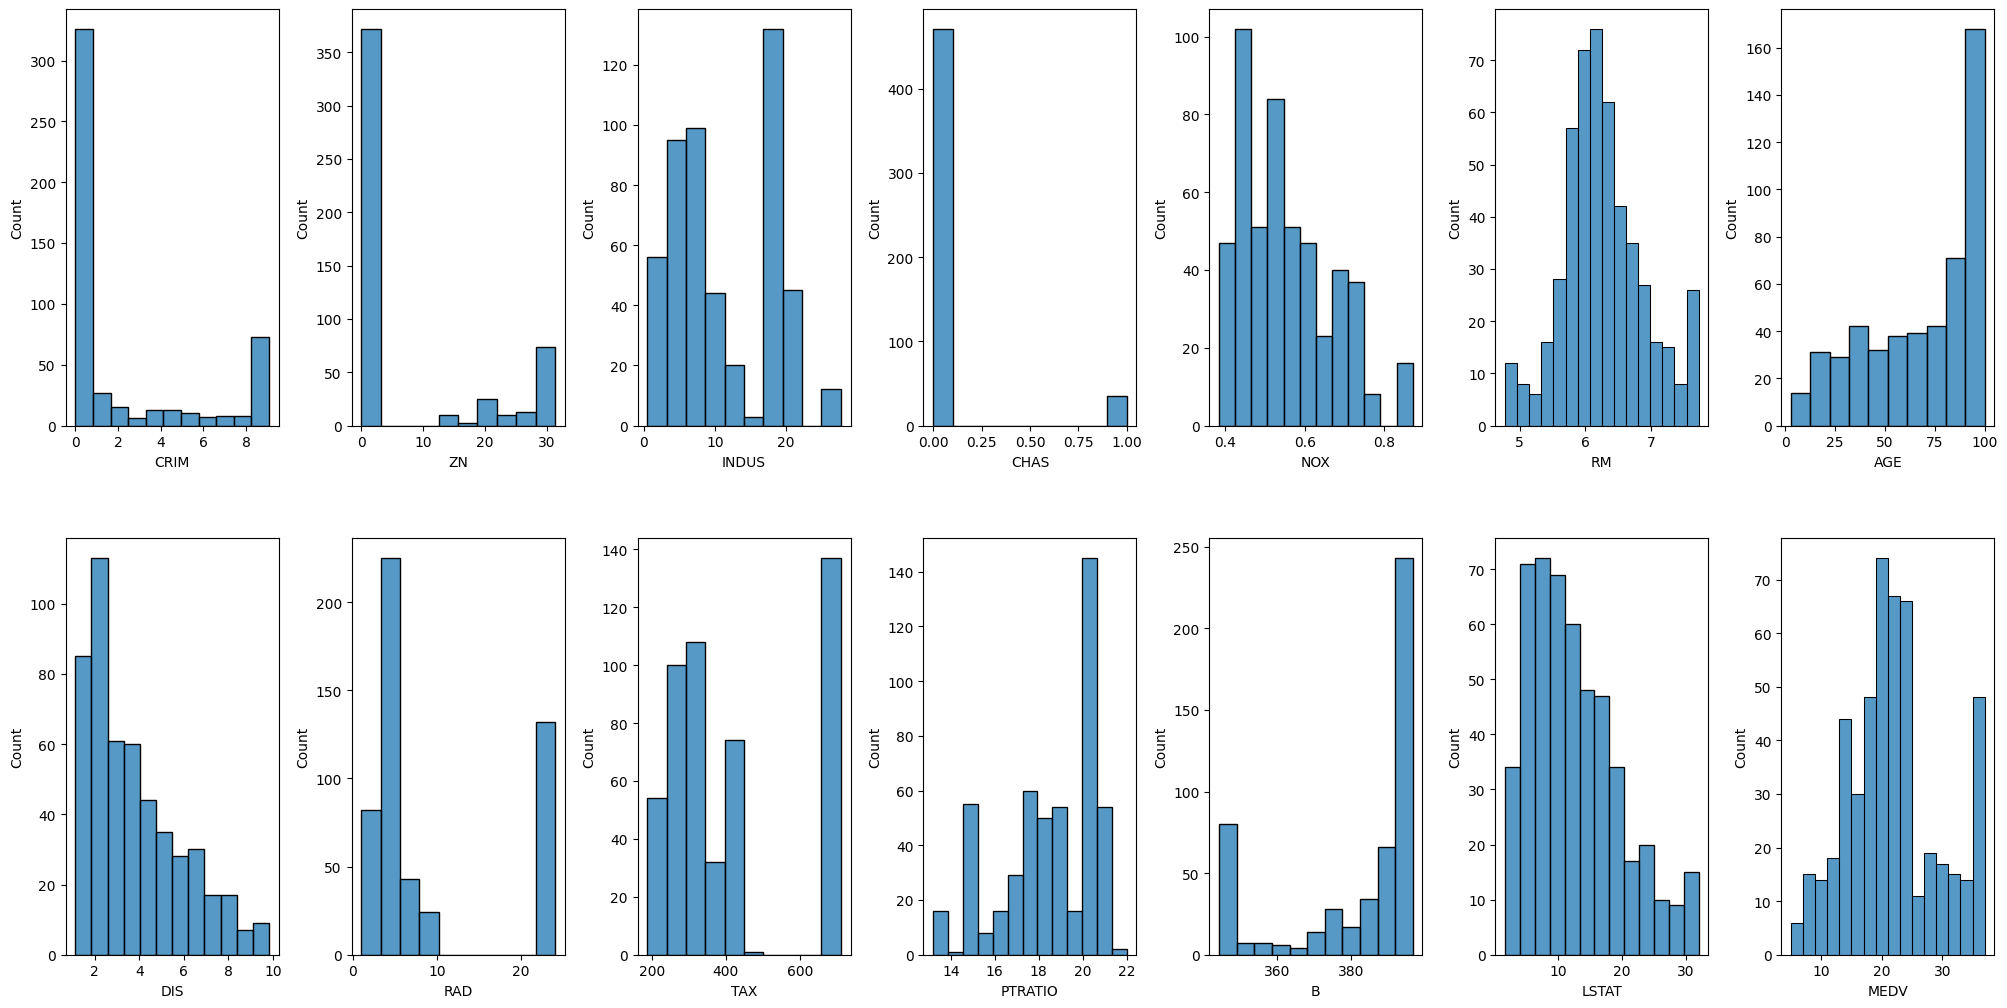

In [15]:
# Crie uma figura e eixos
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Ajuste a forma dos eixos para um array unidimensional
axs = axs.flatten()

# Percorra as colunas do dataframe
for i, col in enumerate(dataset.columns):
    # Crie um histograma em cada eixo usando histplot
    sns.histplot(dataset[col], ax=axs[i])  # usando histplot

# Ajuste o layout da figura
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Mostre a figura
plt.show()

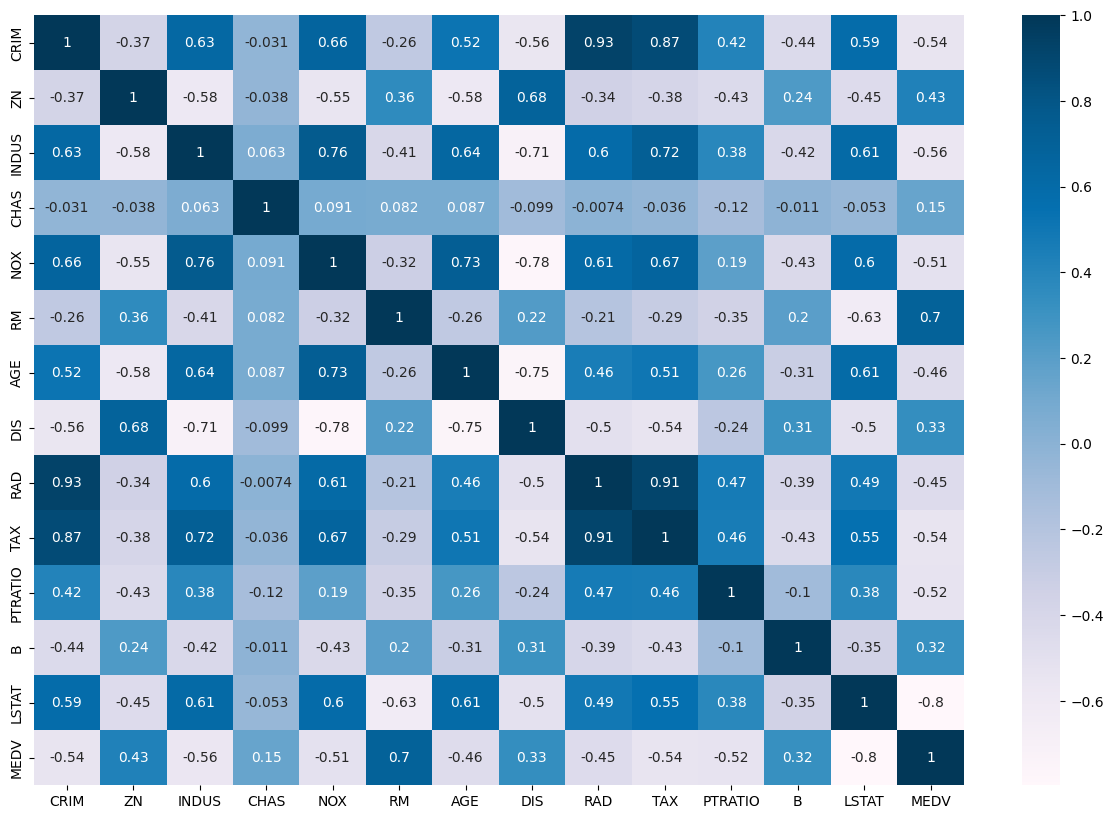

In [16]:
# plt.figure(figsize=(20, 10))
# sns.heatmap(dataset.corr().abs(),  annot=True)

plt.figure(figsize=(15,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [17]:
# Vamos isolar as características de alta correlação...
cor_target = abs(cor['MEDV']) # valor absoluto de correlação

relevant_features = cor_target[cor_target > 0.35] # isolando as características de alta correlação

names = [index for index, value in relevant_features.items()] # pegando apenas os nomes das caracteristicas... os que estão em 'items'

names.remove('MEDV') # removendo a variável alvo (MEDV)

print(names) #  Mosando a lista das características de alta correlação
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
10


A matriz de correlação mostra que TAX e RAD são características altamente correlacionadas. As colunas 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' possuem um valor de correlação acima de 0,35 com MEDV, o que é uma boa indicação para serem usadas como preditoras. Vamos plotar essas colunas em relação ao MEDV.

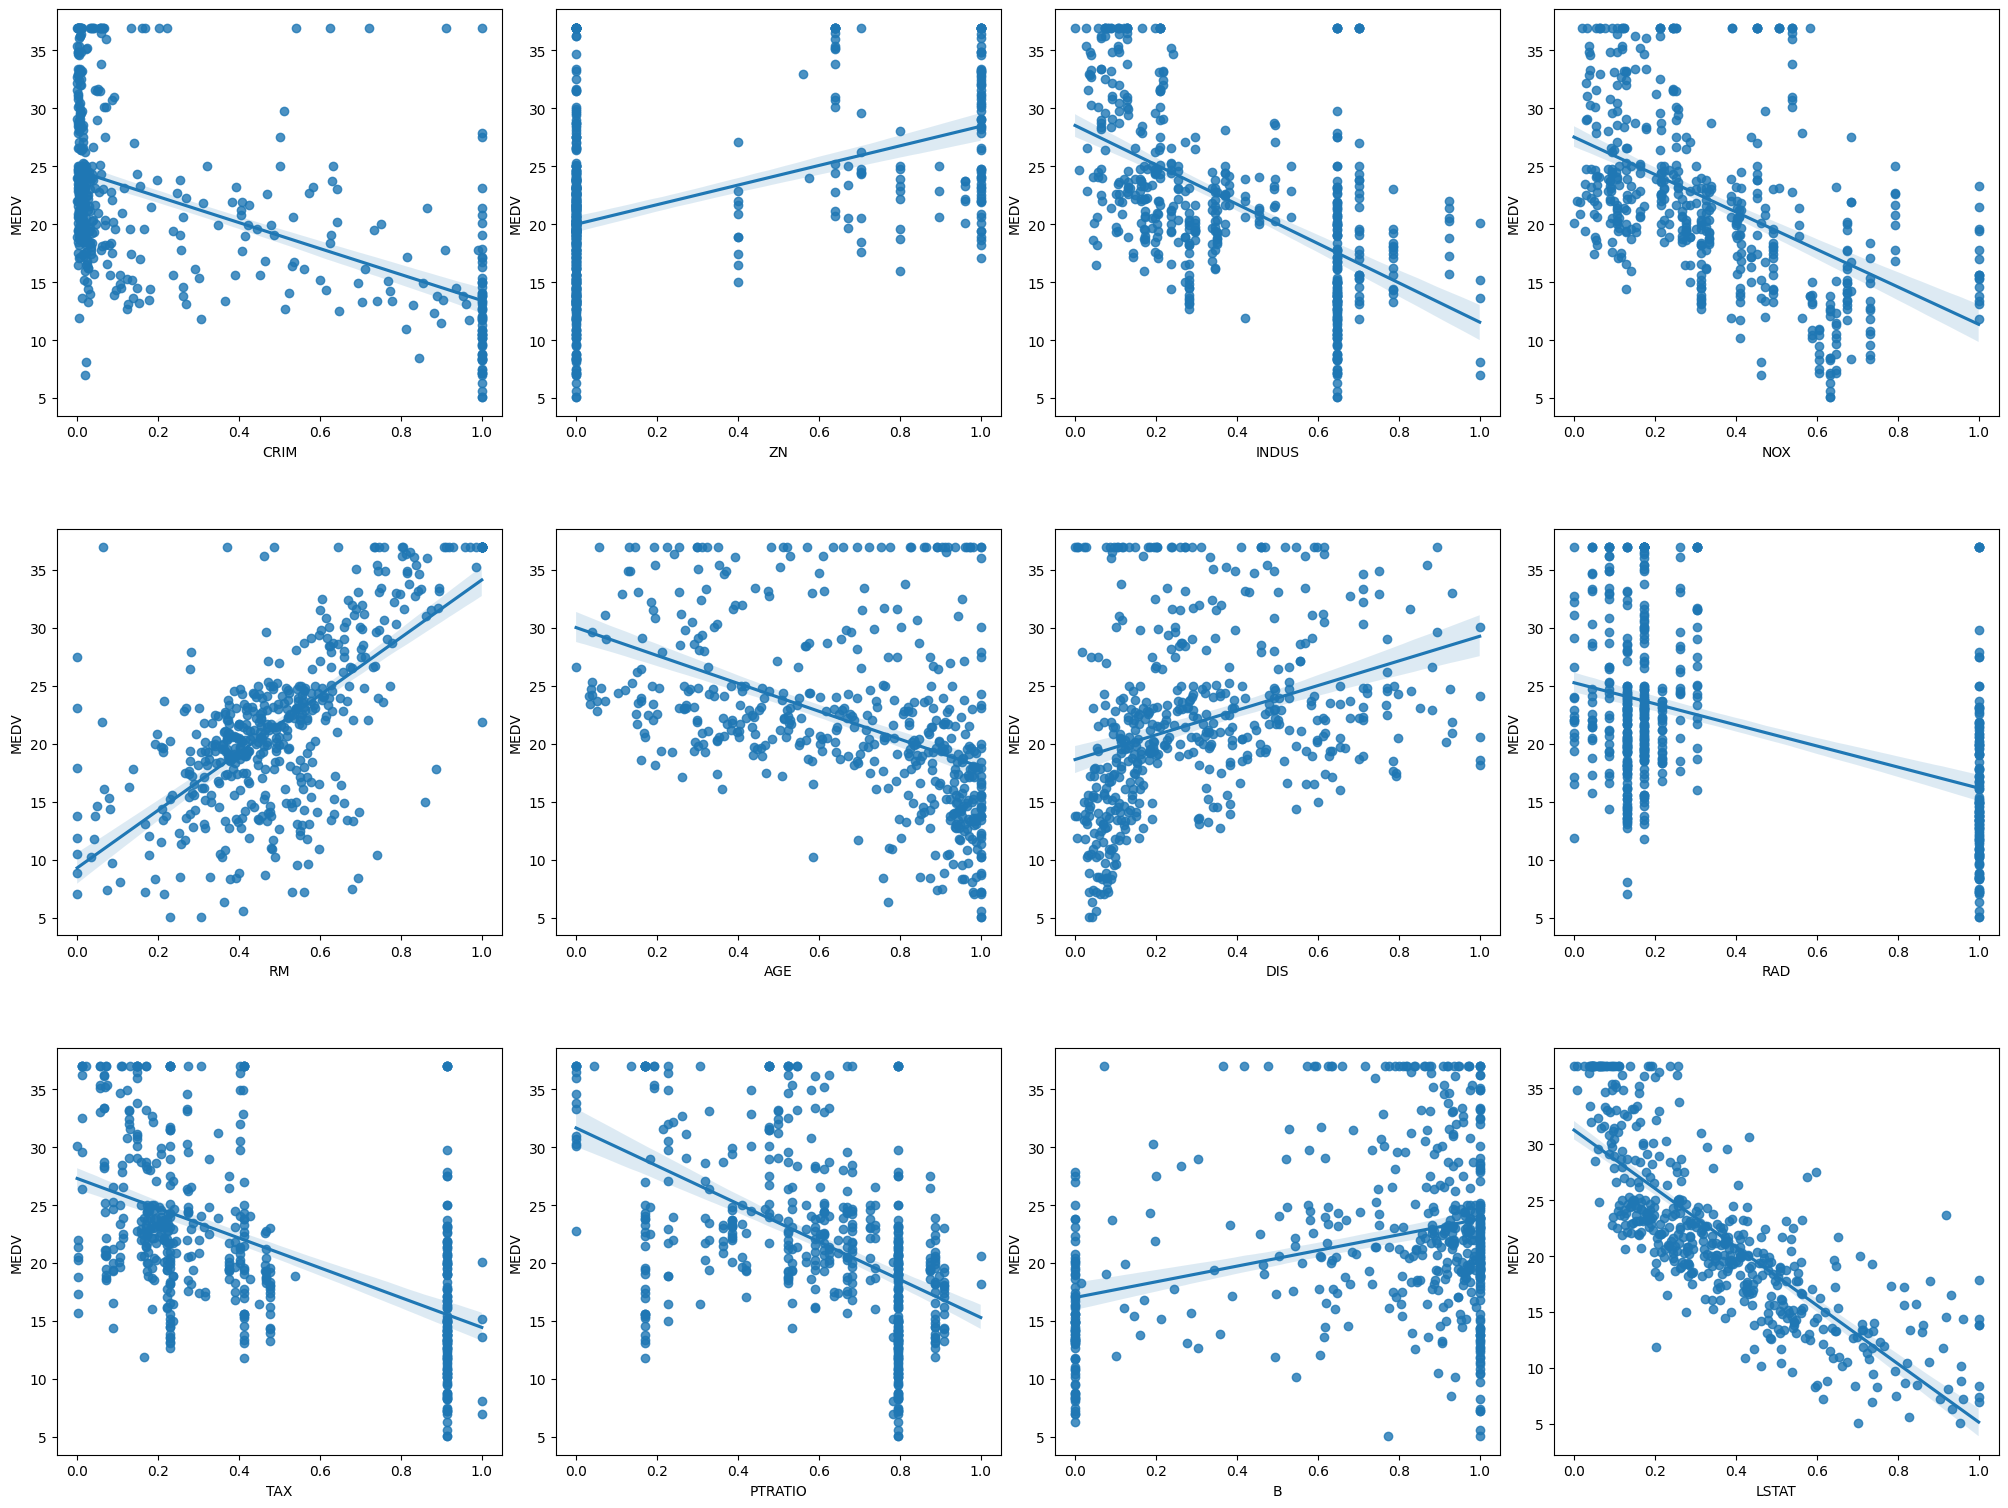

In [18]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = dataset.loc[:,column_sels]
y = dataset['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Com base nessas análises, podemos tentar prever MEDV usando os recursos 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS' e 'AGE'.

##Regressão Linear
### Regressão Linear com Scikit-Learn

In [19]:
#Importando as funções necessárias do pacote Scikit-Learn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
# Dividindo o dataset em teste e treino
column_sels = [ 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
X = dataset.loc[:,column_sels]
X = sm.add_constant(X)
y = dataset['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [49]:
# Dividindo o dataset em teste e treino
column_sels = [  'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
X = dataset.loc[:,column_sels]
X = sm.add_constant(X)
y = dataset['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [50]:

## Modelo
modelo = sm.OLS(y_train, X_train).fit()


# Parâmetros do 'modelo_replicado'
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          1.40e-123
Time:                        17:15:18   Log-Likelihood:                -1098.8
No. Observations:                 404   AIC:                             2214.
Df Residuals:                     396   BIC:                             2246.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9674      4.258      7.742      0.000      24.596      41.339
NOX          -12.8367      3.166     -4.055      0.000     -19.061      -6.613
RM             3.6724      0.393      9.354      0.000       2.901       4.444
AGE           -0.0170      0.011     -1.493      0.136      -0.039       0.005
DIS           -0.9990      0.159     -6.272      0.000      -1.312      -0.686
TAX           -0.0046      0.002     -2.736      0.007      -0.008      -0.001
PTRATIO       -0.7522      0.103     -7.313      0.000      -0.954      -0.550
LSTAT         -0.5028      0.044    -11.557      0.000      -0.588      -0.417
==============================================================================
Omnibus:                       50.605   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.322
Skew:                           0.717   Prob(JB):                     1.21e-21
Kurtosis:                       4.914   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Instanciando o modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
# Rodando o modelo
predictions = lr.predict(X_test)

In [53]:
# Um exemplo:
print('Valor atual da casa......: ', y_test.iloc[10])
print('Valor predito pelo modelo: ', predictions[10])

Valor atual da casa......:  21.5
Valor predito pelo modelo:  20.667756746632353


In [54]:
# Diferença entre o modelo e o valor real
print('$', abs(y_test.iloc[10] - predictions[10]))

$ 0.8322432533676469


## Checando a Acurácia do Modelo
MSE: Mean Square Error


In [55]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(mse)

12.964492215754262


O MSE do modelo está relativamente alto. Pode ser algum problema no split dos dados ou que o modelo de regressão linear não é o modelo mais apropriado para se trabalhar com esse tipo de problema.

##Acurácia do Modelo (%)

In [56]:
lr.score(X_test, y_test)

0.7350126630551425

73,96 % de acurácia de um Modelo de Regressão Linear, não é tão ruim. Todavia, devemos buscar algo um pouco melhor.

Mas para o primeiro modelo... já está bem legal!!
**negrito**